Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module


Parameters

In [2]:
#output_size = 20
gamma = 1
no, seq_len, dim = 12800, 24, 1

parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 1
parameters['iterations'] = 100
parameters['batch_size'] = 128
parameters['epoch'] = 2

Data Generation:
12800 synthetic time univariate timeseries are created, with 24 timesteps each 

In [3]:
data = sine_data_generation(no, seq_len, dim)
data = MinMaxScaler(data)
data = torch.Tensor(data)
data.shape

torch.Size([12800, 24, 1])

Training and Examination of generating process: for each epoch a single sample is generated from the current state of the generator and visualized alongside with the coressponding loss values

Start Embedding Network Training
step: 1/2, e_loss: 0.475886
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/2, s_loss: 0.11012582
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/2, D_loss: 3.6467662, G_loss_U: 0.26622966, G_loss_S: 0.0076422887, E_loss_t0: 2.204209


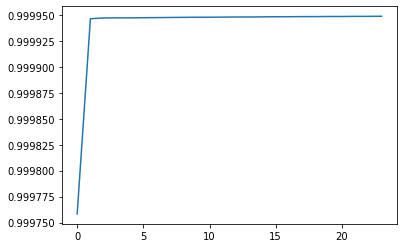

step: 0/2, D_loss: 3.126805, G_loss_U: 0.3920519, G_loss_S: 0.0070850495, E_loss_t0: 2.1808276


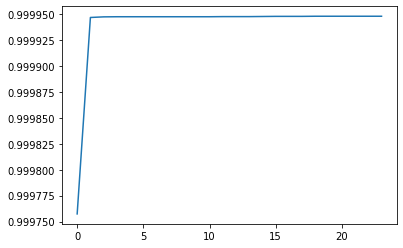

step: 0/2, D_loss: 2.562586, G_loss_U: 0.5631508, G_loss_S: 0.007657937, E_loss_t0: 2.2709792


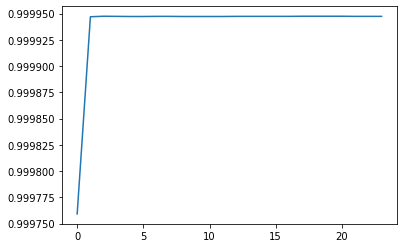

step: 0/2, D_loss: 2.1662285, G_loss_U: 0.7616373, G_loss_S: 0.007727908, E_loss_t0: 2.2761273


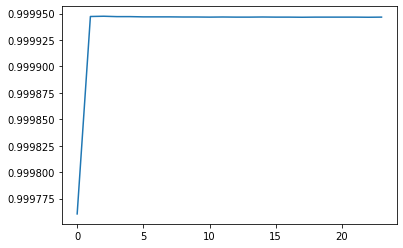

step: 0/2, D_loss: 1.9527051, G_loss_U: 0.9662576, G_loss_S: 0.00722938, E_loss_t0: 2.1960094


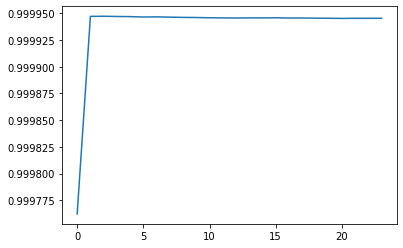

step: 0/2, D_loss: 1.8729972, G_loss_U: 1.152239, G_loss_S: 0.006986363, E_loss_t0: 2.2400508


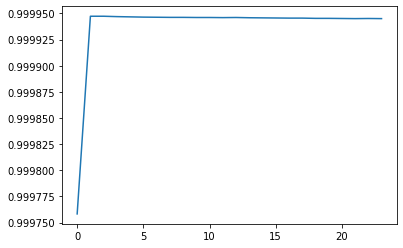

step: 0/2, D_loss: 1.8691298, G_loss_U: 1.2911559, G_loss_S: 0.0073818755, E_loss_t0: 2.3049355


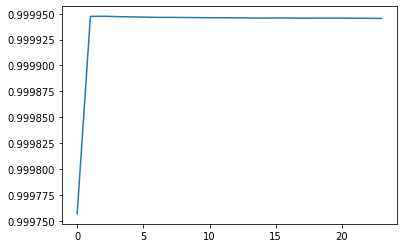

step: 0/2, D_loss: 1.8902622, G_loss_U: 1.3659716, G_loss_S: 0.0074018883, E_loss_t0: 2.199231


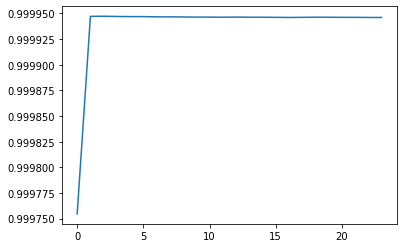

step: 0/2, D_loss: 1.9048123, G_loss_U: 1.3786684, G_loss_S: 0.007629828, E_loss_t0: 2.2974744


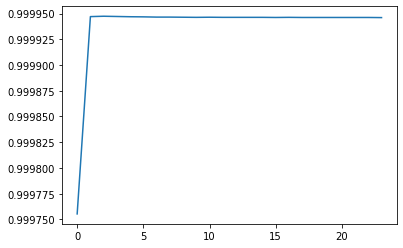

step: 0/2, D_loss: 1.8968318, G_loss_U: 1.341886, G_loss_S: 0.006889559, E_loss_t0: 2.2090201


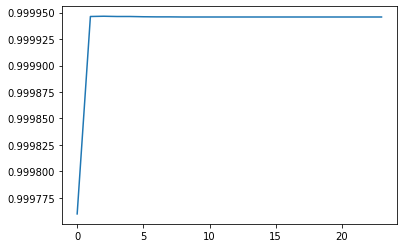

step: 0/2, D_loss: 1.8711112, G_loss_U: 1.2713835, G_loss_S: 0.007329757, E_loss_t0: 2.2937975


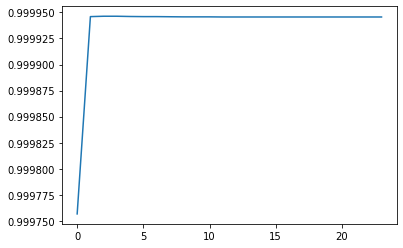

step: 0/2, D_loss: 1.8354976, G_loss_U: 1.1819175, G_loss_S: 0.006971606, E_loss_t0: 2.278009


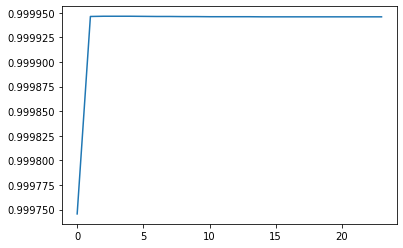

step: 0/2, D_loss: 1.7987083, G_loss_U: 1.086541, G_loss_S: 0.0075784056, E_loss_t0: 2.170547


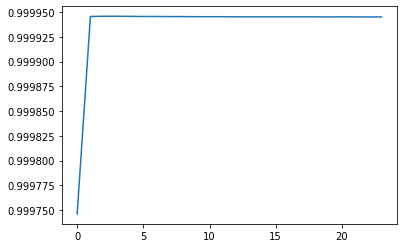

step: 0/2, D_loss: 1.7722682, G_loss_U: 0.99631375, G_loss_S: 0.0074262507, E_loss_t0: 2.1954677


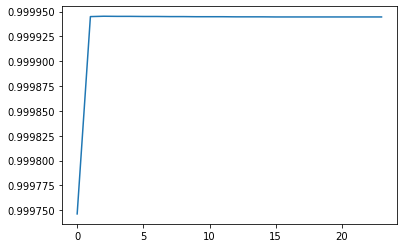

step: 0/2, D_loss: 1.7551484, G_loss_U: 0.9200577, G_loss_S: 0.0071435333, E_loss_t0: 2.1655686


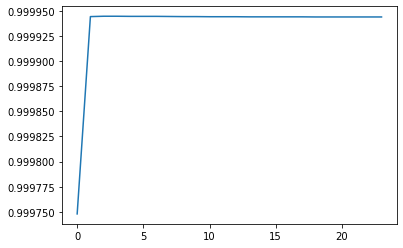

step: 0/2, D_loss: 1.7441854, G_loss_U: 0.8633463, G_loss_S: 0.007264499, E_loss_t0: 2.2113404


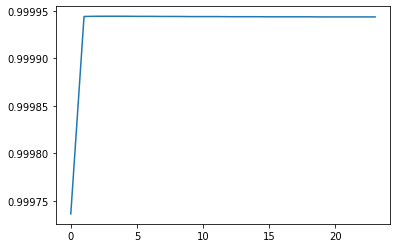

step: 0/2, D_loss: 1.729159, G_loss_U: 0.8284688, G_loss_S: 0.007276627, E_loss_t0: 2.2087202


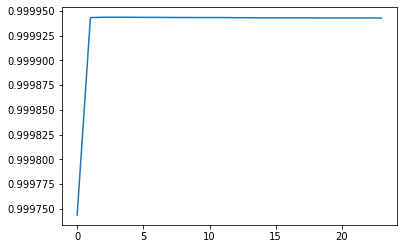

step: 0/2, D_loss: 1.70381, G_loss_U: 0.8149393, G_loss_S: 0.0074063125, E_loss_t0: 2.232636


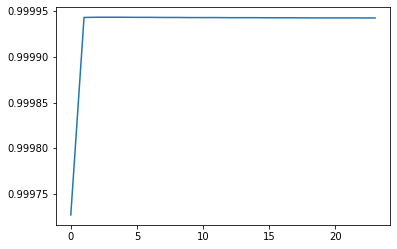

step: 0/2, D_loss: 1.6638912, G_loss_U: 0.82079095, G_loss_S: 0.006950617, E_loss_t0: 2.1426063


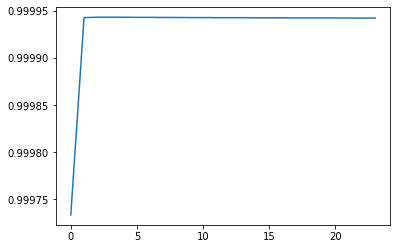

step: 0/2, D_loss: 1.6213369, G_loss_U: 0.8420848, G_loss_S: 0.007478912, E_loss_t0: 2.2582166


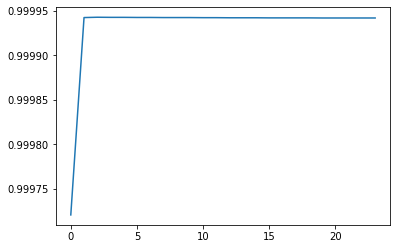

step: 0/2, D_loss: 1.5766374, G_loss_U: 0.8716977, G_loss_S: 0.007097525, E_loss_t0: 2.2240784


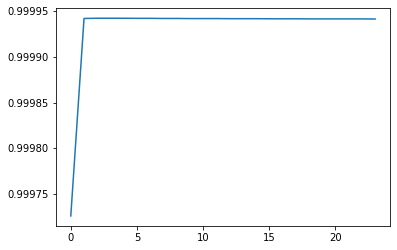

step: 0/2, D_loss: 1.5359583, G_loss_U: 0.8952562, G_loss_S: 0.0074906102, E_loss_t0: 2.2265677


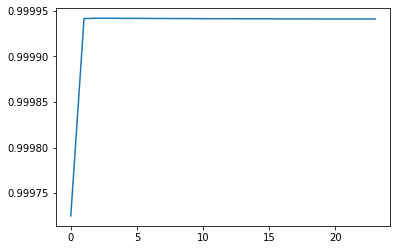

step: 0/2, D_loss: 1.4996823, G_loss_U: 0.89038914, G_loss_S: 0.007354392, E_loss_t0: 2.263277


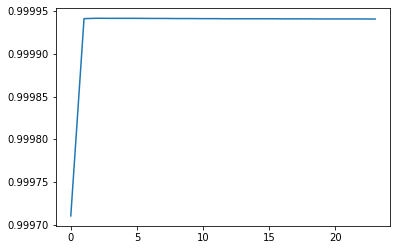

step: 0/2, D_loss: 1.4481425, G_loss_U: 0.85492176, G_loss_S: 0.0072702887, E_loss_t0: 2.179657


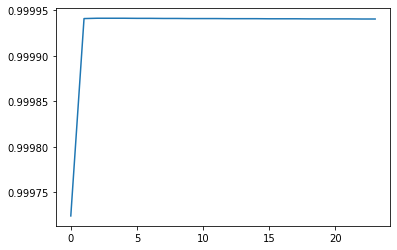

step: 0/2, D_loss: 1.3991437, G_loss_U: 0.8505971, G_loss_S: 0.00737073, E_loss_t0: 2.2221541


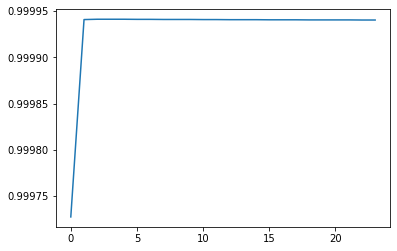

step: 0/2, D_loss: 1.329987, G_loss_U: 1.0870553, G_loss_S: 0.008206343, E_loss_t0: 2.1964748


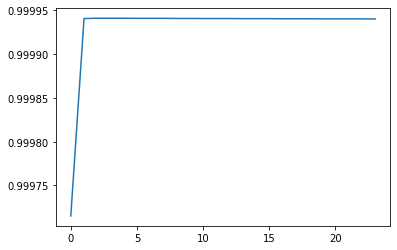

step: 0/2, D_loss: 1.2200094, G_loss_U: 1.2717465, G_loss_S: 0.007992222, E_loss_t0: 2.22576


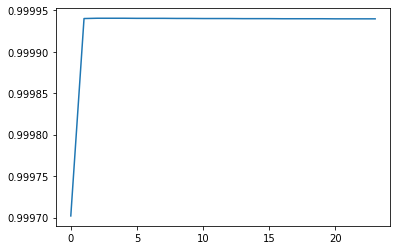

step: 0/2, D_loss: 1.0250225, G_loss_U: 0.75039595, G_loss_S: 0.008311548, E_loss_t0: 2.0862923


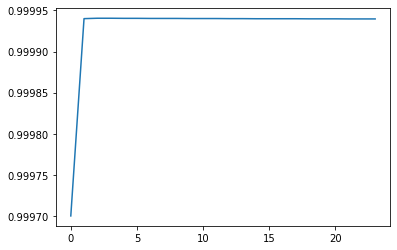

step: 0/2, D_loss: 1.2004452, G_loss_U: 1.9392661, G_loss_S: 0.008422525, E_loss_t0: 2.2105985


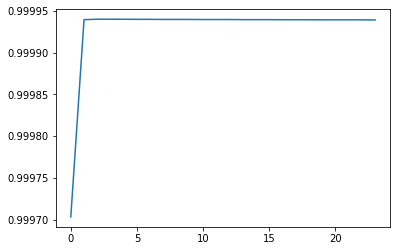

step: 0/2, D_loss: 1.2895325, G_loss_U: 2.0073664, G_loss_S: 0.009031936, E_loss_t0: 2.1281803


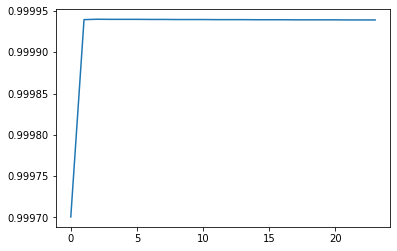

step: 0/2, D_loss: 1.2064246, G_loss_U: 1.6719503, G_loss_S: 0.009059797, E_loss_t0: 2.1732116


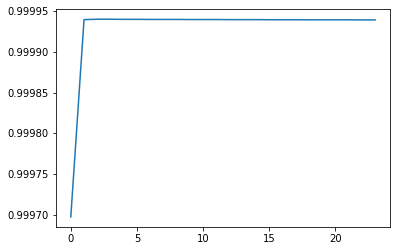

step: 0/2, D_loss: 0.57515675, G_loss_U: 0.513223, G_loss_S: 0.009862979, E_loss_t0: 2.2640872


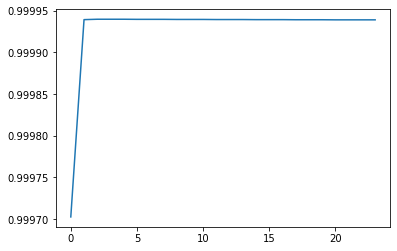

step: 0/2, D_loss: 1.4815751, G_loss_U: 1.349044, G_loss_S: 0.010770116, E_loss_t0: 2.1860008


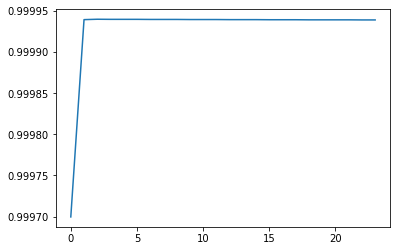

step: 0/2, D_loss: 0.5551928, G_loss_U: 1.9484655, G_loss_S: 0.011838364, E_loss_t0: 2.2398329


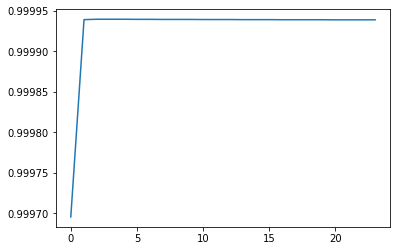

step: 0/2, D_loss: 0.44250554, G_loss_U: 2.26298, G_loss_S: 0.014155984, E_loss_t0: 2.164513


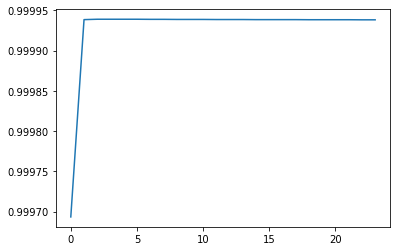

step: 0/2, D_loss: 0.53602684, G_loss_U: 2.421127, G_loss_S: 0.014496272, E_loss_t0: 2.2352839


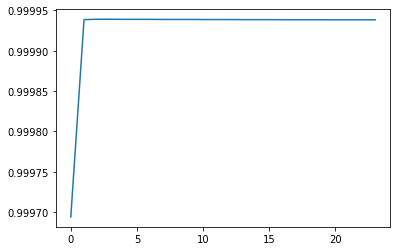

step: 0/2, D_loss: 0.48983017, G_loss_U: 2.4830384, G_loss_S: 0.015692927, E_loss_t0: 2.163026


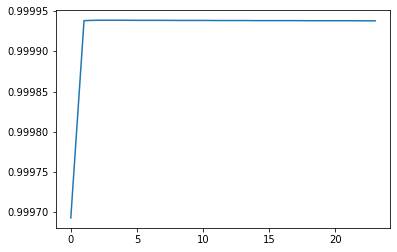

step: 0/2, D_loss: 0.3976824, G_loss_U: 2.4867103, G_loss_S: 0.017151263, E_loss_t0: 2.2460983


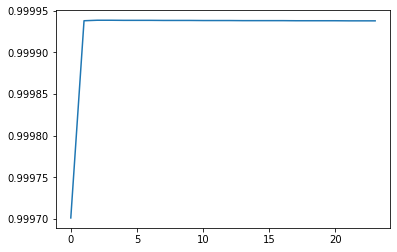

step: 0/2, D_loss: 0.28769192, G_loss_U: 2.4820597, G_loss_S: 0.019236213, E_loss_t0: 2.1648235


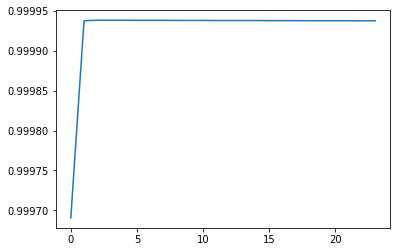

step: 0/2, D_loss: 0.25191164, G_loss_U: 2.4767387, G_loss_S: 0.020530319, E_loss_t0: 2.1975129


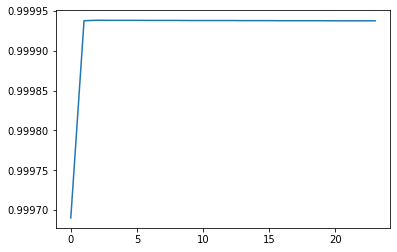

step: 0/2, D_loss: 0.22577798, G_loss_U: 2.4791412, G_loss_S: 0.02265277, E_loss_t0: 2.1976573


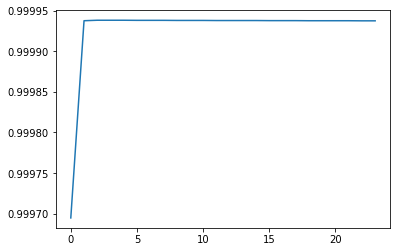

step: 0/2, D_loss: 0.20676626, G_loss_U: 2.4989207, G_loss_S: 0.024406198, E_loss_t0: 2.1576633


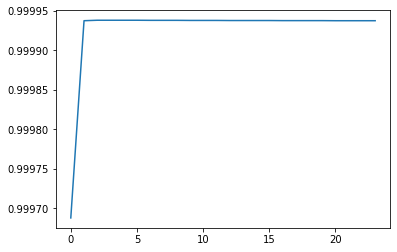

step: 0/2, D_loss: 0.19181712, G_loss_U: 2.5458567, G_loss_S: 0.026162218, E_loss_t0: 2.1440756


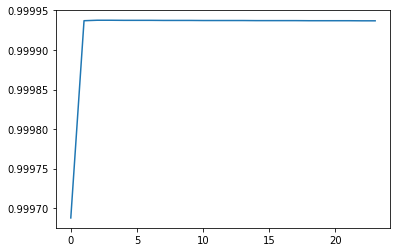

step: 0/2, D_loss: 0.1773299, G_loss_U: 2.626834, G_loss_S: 0.027767181, E_loss_t0: 2.1433365


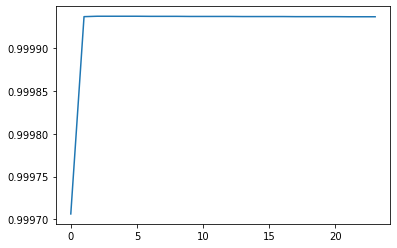

step: 0/2, D_loss: 0.16399762, G_loss_U: 2.741522, G_loss_S: 0.029000407, E_loss_t0: 2.1841564


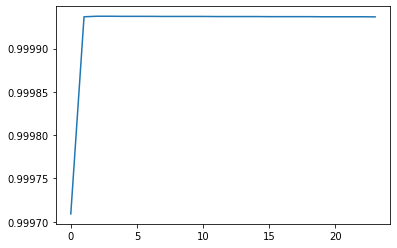

step: 0/2, D_loss: 0.15082777, G_loss_U: 2.882262, G_loss_S: 0.030726716, E_loss_t0: 2.2220762


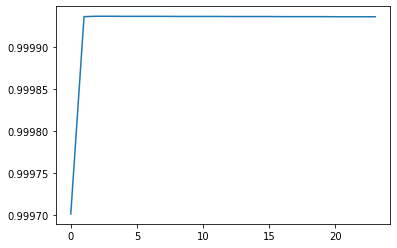

step: 0/2, D_loss: 0.13792834, G_loss_U: 2.8729868, G_loss_S: 0.03209619, E_loss_t0: 2.214853


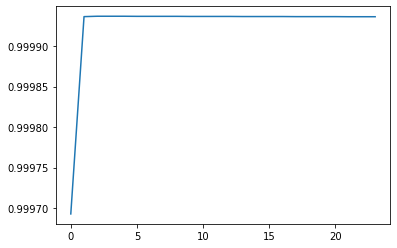

step: 0/2, D_loss: 0.1361084, G_loss_U: 2.8627157, G_loss_S: 0.033755917, E_loss_t0: 2.141368


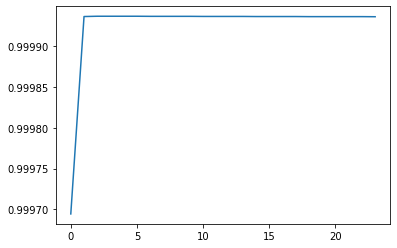

step: 0/2, D_loss: 0.13634203, G_loss_U: 2.851486, G_loss_S: 0.034113955, E_loss_t0: 2.187281


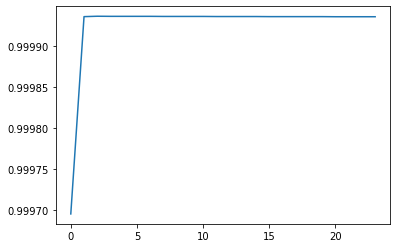

step: 0/2, D_loss: 0.13654877, G_loss_U: 2.8393037, G_loss_S: 0.034713183, E_loss_t0: 2.2203503


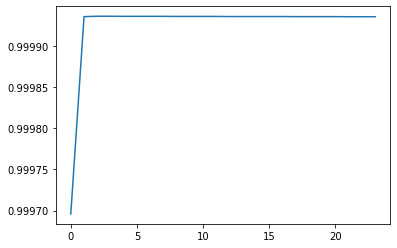

step: 0/2, D_loss: 0.13666734, G_loss_U: 2.8261747, G_loss_S: 0.036150727, E_loss_t0: 2.228501


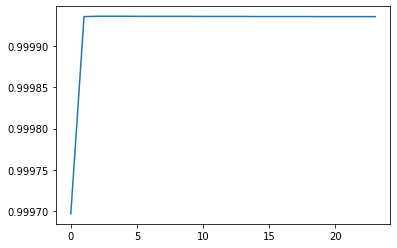

step: 0/2, D_loss: 0.13761266, G_loss_U: 2.812157, G_loss_S: 0.037506457, E_loss_t0: 2.1303627


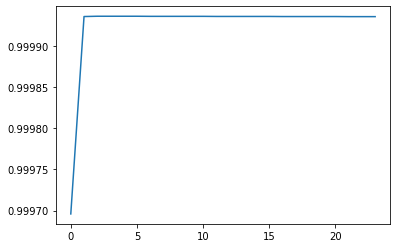

step: 0/2, D_loss: 0.1381806, G_loss_U: 2.7974446, G_loss_S: 0.036938734, E_loss_t0: 2.19329


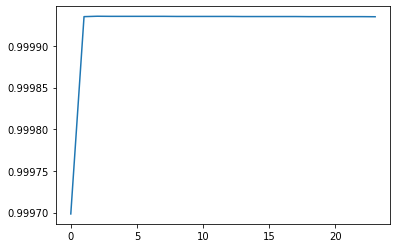

step: 0/2, D_loss: 0.13888904, G_loss_U: 2.7824519, G_loss_S: 0.03796037, E_loss_t0: 2.178365


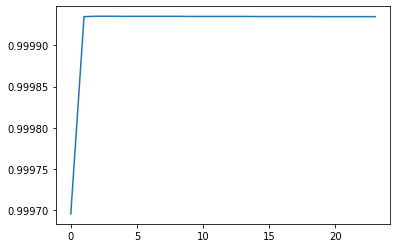

step: 0/2, D_loss: 0.13998131, G_loss_U: 2.7676017, G_loss_S: 0.037755296, E_loss_t0: 2.2323344


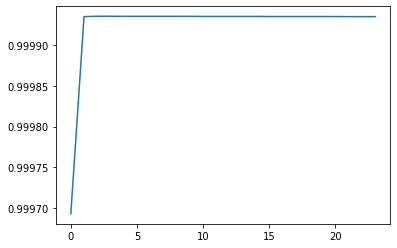

step: 0/2, D_loss: 0.14101237, G_loss_U: 2.7527807, G_loss_S: 0.03821501, E_loss_t0: 2.191753


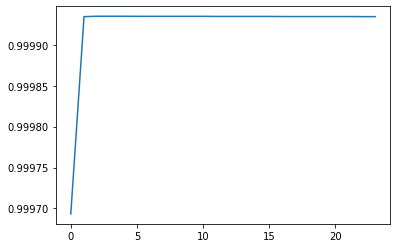

step: 0/2, D_loss: 0.14127435, G_loss_U: 2.737015, G_loss_S: 0.03834021, E_loss_t0: 2.2014542


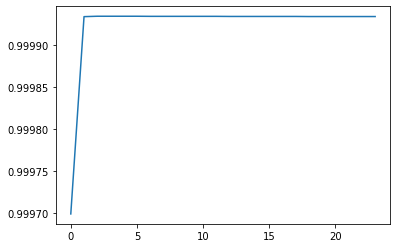

step: 0/2, D_loss: 0.14314225, G_loss_U: 2.7188082, G_loss_S: 0.0385302, E_loss_t0: 2.1907485


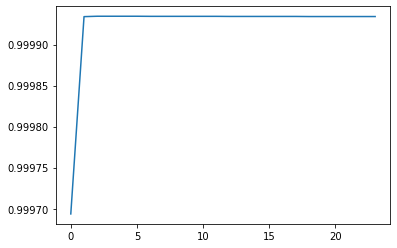

step: 0/2, D_loss: 0.14517608, G_loss_U: 2.696845, G_loss_S: 0.03825421, E_loss_t0: 2.2351377


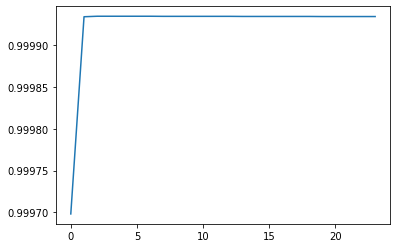

step: 0/2, D_loss: 0.1472205, G_loss_U: 2.6704648, G_loss_S: 0.038821355, E_loss_t0: 2.1389427


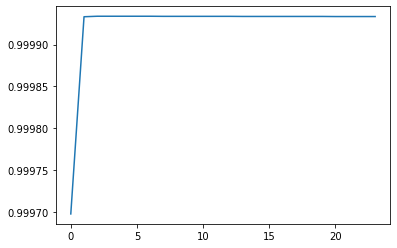

step: 0/2, D_loss: 0.14983286, G_loss_U: 2.6395924, G_loss_S: 0.0388817, E_loss_t0: 2.1569803


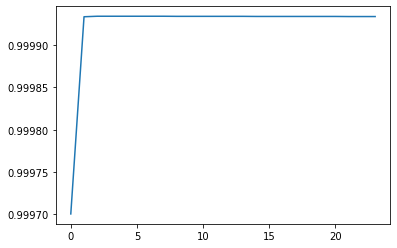

step: 0/2, D_loss: 0.15313277, G_loss_U: 2.8284767, G_loss_S: 0.03815553, E_loss_t0: 2.2032201


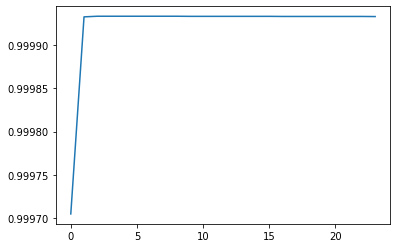

step: 0/2, D_loss: 0.13668232, G_loss_U: 2.7961447, G_loss_S: 0.037675623, E_loss_t0: 2.2416968


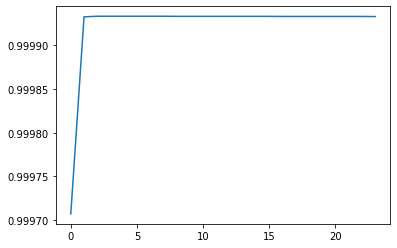

step: 0/2, D_loss: 0.13926055, G_loss_U: 2.7625914, G_loss_S: 0.037745815, E_loss_t0: 2.1897795


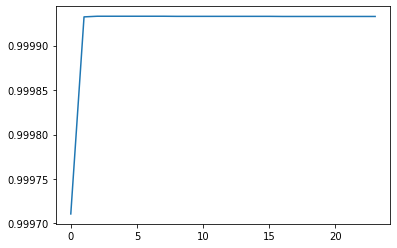

step: 0/2, D_loss: 0.14310126, G_loss_U: 2.7289877, G_loss_S: 0.03691354, E_loss_t0: 2.2275238


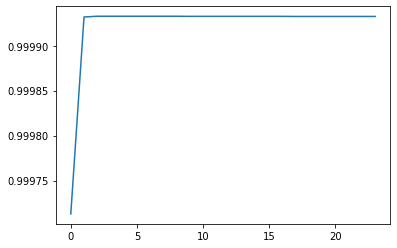

step: 0/2, D_loss: 0.14628914, G_loss_U: 2.6958778, G_loss_S: 0.03706588, E_loss_t0: 2.2095187


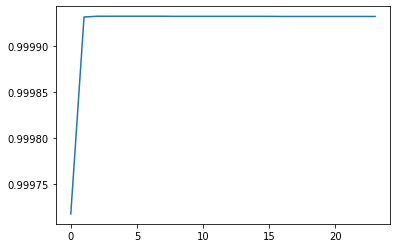

step: 0/2, D_loss: 0.15056525, G_loss_U: 2.9543362, G_loss_S: 0.03689427, E_loss_t0: 2.22528


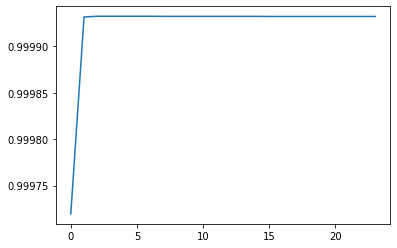

step: 0/2, D_loss: 0.13062458, G_loss_U: 2.9307773, G_loss_S: 0.035490815, E_loss_t0: 2.2648363


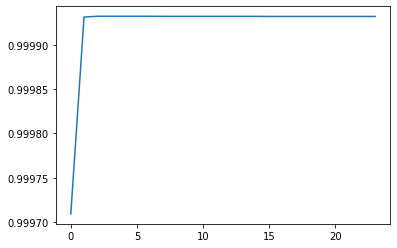

step: 0/2, D_loss: 0.13189152, G_loss_U: 2.9096515, G_loss_S: 0.03617299, E_loss_t0: 2.2032003


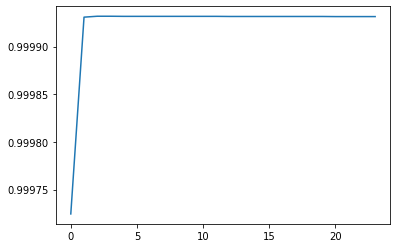

step: 0/2, D_loss: 0.13512278, G_loss_U: 2.8923433, G_loss_S: 0.03627996, E_loss_t0: 2.1992319


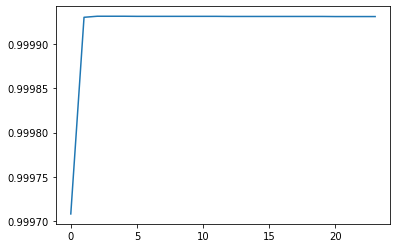

step: 0/2, D_loss: 0.13608965, G_loss_U: 2.879357, G_loss_S: 0.035784096, E_loss_t0: 2.16923


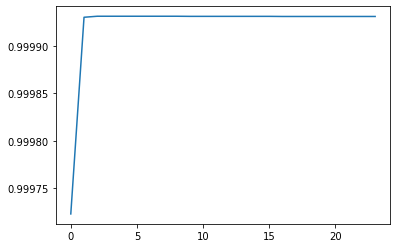

step: 0/2, D_loss: 0.13771398, G_loss_U: 2.869957, G_loss_S: 0.03529017, E_loss_t0: 2.2136197


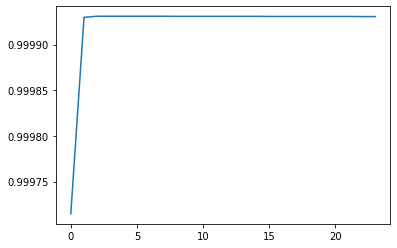

step: 0/2, D_loss: 0.13811754, G_loss_U: 2.862749, G_loss_S: 0.035511278, E_loss_t0: 2.116204


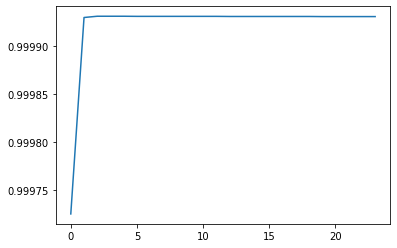

step: 0/2, D_loss: 0.13977017, G_loss_U: 2.85627, G_loss_S: 0.035067182, E_loss_t0: 2.138772


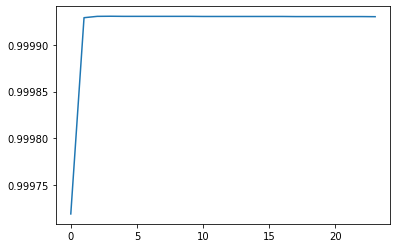

step: 0/2, D_loss: 0.14090887, G_loss_U: 2.8491144, G_loss_S: 0.03421577, E_loss_t0: 2.1803906


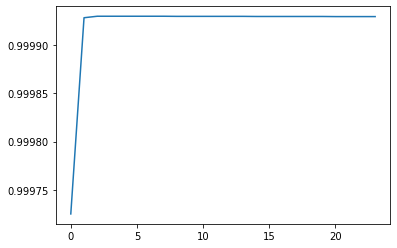

step: 0/2, D_loss: 0.14228328, G_loss_U: 2.8397825, G_loss_S: 0.03324289, E_loss_t0: 2.2710679


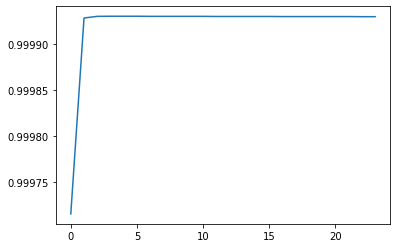

step: 0/2, D_loss: 0.14501671, G_loss_U: 2.826559, G_loss_S: 0.03276278, E_loss_t0: 2.2572932


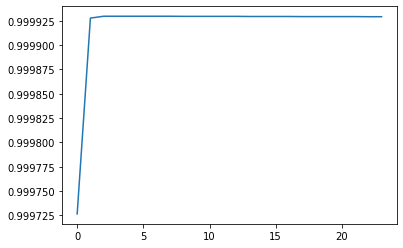

step: 0/2, D_loss: 0.14840089, G_loss_U: 2.8076913, G_loss_S: 0.033586267, E_loss_t0: 2.1661837


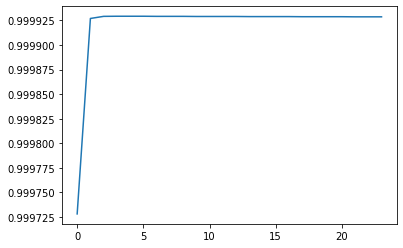

step: 0/2, D_loss: 0.15425983, G_loss_U: 3.1143353, G_loss_S: 0.032527003, E_loss_t0: 2.2037563


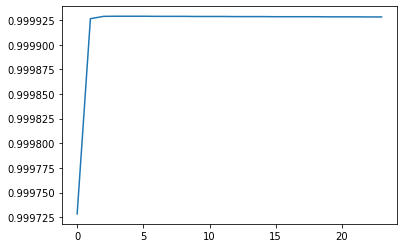

step: 0/2, D_loss: 0.1382308, G_loss_U: 3.091774, G_loss_S: 0.031558096, E_loss_t0: 2.295007


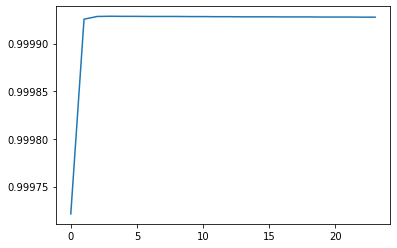

step: 0/2, D_loss: 0.15208618, G_loss_U: 3.37432, G_loss_S: 0.03256625, E_loss_t0: 2.1632142


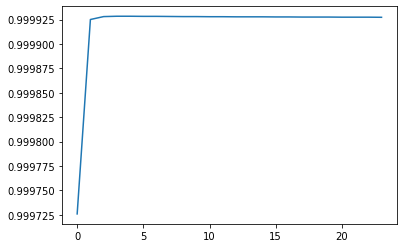

step: 0/2, D_loss: 0.14872515, G_loss_U: 3.3590927, G_loss_S: 0.031209443, E_loss_t0: 2.233689


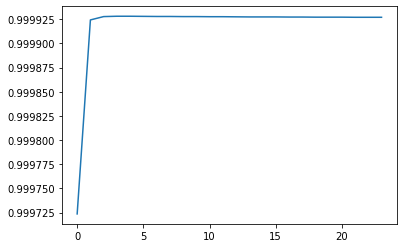

step: 0/2, D_loss: 2.2368226, G_loss_U: 4.0387907, G_loss_S: 0.03202032, E_loss_t0: 2.1360943


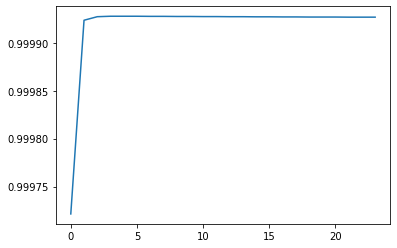

step: 0/2, D_loss: 0.12840495, G_loss_U: 4.0426984, G_loss_S: 0.030591888, E_loss_t0: 2.2711687


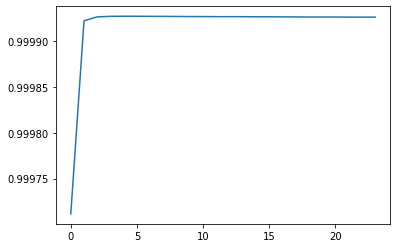

step: 0/2, D_loss: 0.12555973, G_loss_U: 4.0466743, G_loss_S: 0.031101262, E_loss_t0: 2.1703155


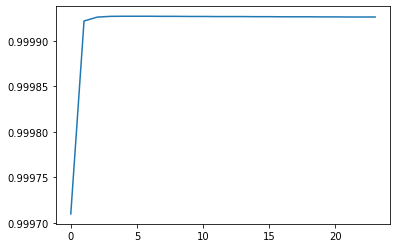

step: 0/2, D_loss: 0.121528774, G_loss_U: 4.050582, G_loss_S: 0.030912107, E_loss_t0: 2.1672242


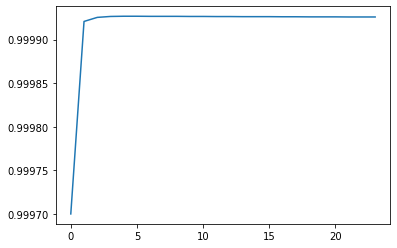

step: 0/2, D_loss: 0.12064324, G_loss_U: 4.0543036, G_loss_S: 0.03021812, E_loss_t0: 2.156892


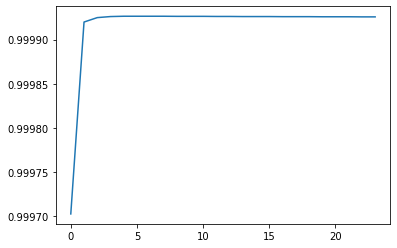

step: 0/2, D_loss: 0.12072724, G_loss_U: 4.057758, G_loss_S: 0.029725485, E_loss_t0: 2.2310607


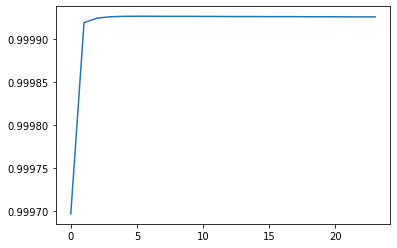

step: 0/2, D_loss: 0.11911154, G_loss_U: 4.0608964, G_loss_S: 0.029749447, E_loss_t0: 2.1457222


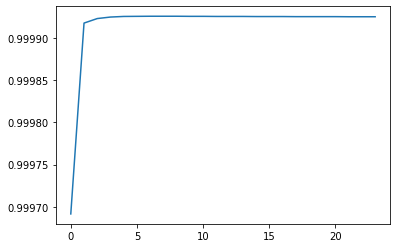

step: 0/2, D_loss: 0.119870245, G_loss_U: 4.063703, G_loss_S: 0.028565971, E_loss_t0: 2.2724118


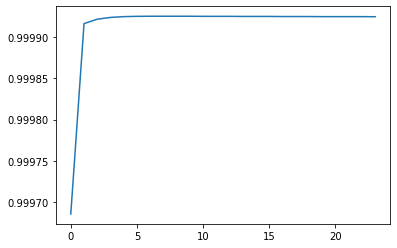

step: 0/2, D_loss: 0.11837415, G_loss_U: 4.0661836, G_loss_S: 0.029254777, E_loss_t0: 2.1616294


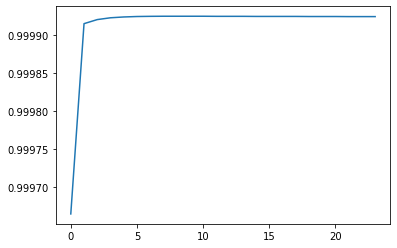

step: 0/2, D_loss: 0.11883978, G_loss_U: 4.0683575, G_loss_S: 0.028546777, E_loss_t0: 2.2777193


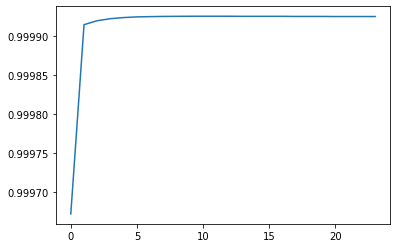

step: 0/2, D_loss: 0.11817211, G_loss_U: 4.070252, G_loss_S: 0.027983239, E_loss_t0: 2.2676582


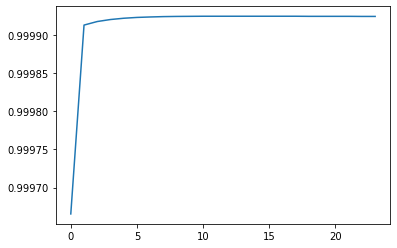

step: 0/2, D_loss: 0.12012373, G_loss_U: 4.071897, G_loss_S: 0.027676221, E_loss_t0: 2.2144864


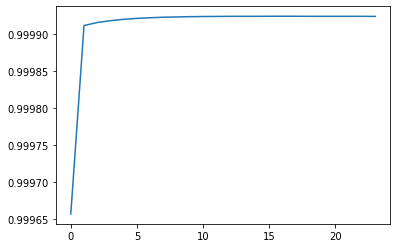

step: 0/2, D_loss: 0.11989197, G_loss_U: 4.073321, G_loss_S: 0.02741033, E_loss_t0: 2.2898064


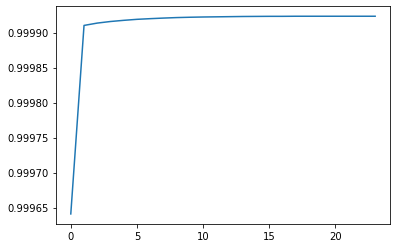

step: 0/2, D_loss: 0.119094186, G_loss_U: 4.0745525, G_loss_S: 0.02792944, E_loss_t0: 2.135184


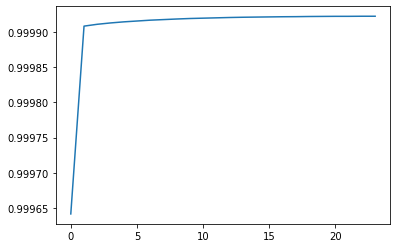

step: 0/2, D_loss: 0.11999087, G_loss_U: 4.0756164, G_loss_S: 0.027281487, E_loss_t0: 2.1729343


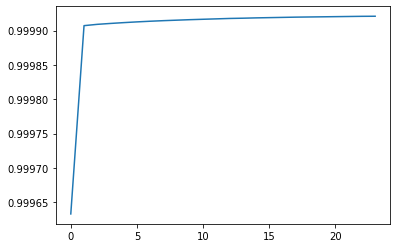

step: 0/2, D_loss: 0.120683335, G_loss_U: 4.0765347, G_loss_S: 0.026845213, E_loss_t0: 2.2634563


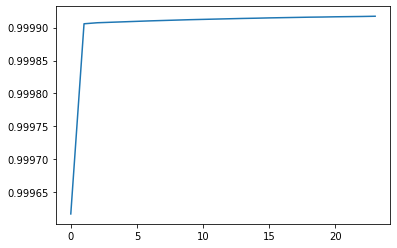

step: 0/2, D_loss: 0.11998799, G_loss_U: 4.0773253, G_loss_S: 0.027356965, E_loss_t0: 2.0364108


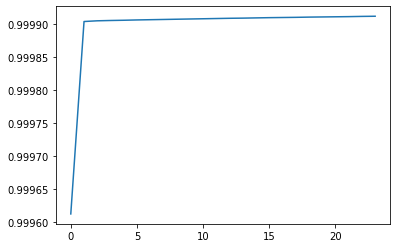

step: 0/2, D_loss: 0.11985351, G_loss_U: 4.0780063, G_loss_S: 0.02647825, E_loss_t0: 2.2268045


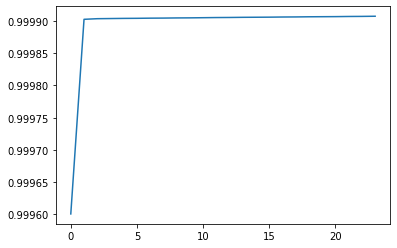

step: 1/2, D_loss: 2.5273895, G_loss_U: 4.1536613, G_loss_S: 0.025838831, E_loss_t0: 2.204105


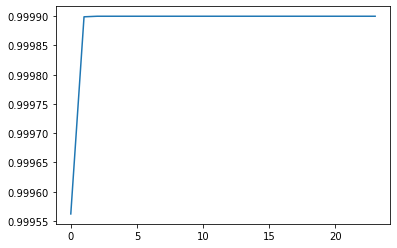

step: 1/2, D_loss: 2.4726288, G_loss_U: 3.914319, G_loss_S: 0.027881013, E_loss_t0: 2.1807134


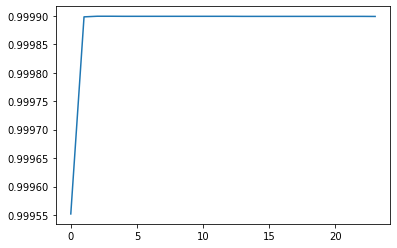

step: 1/2, D_loss: 1.6396048, G_loss_U: 3.5963852, G_loss_S: 0.031815846, E_loss_t0: 2.2708685


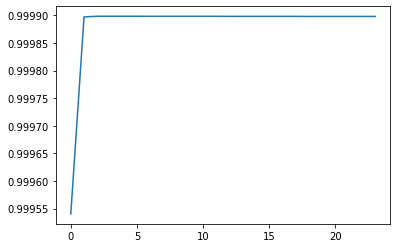

step: 1/2, D_loss: 0.34415096, G_loss_U: 3.288977, G_loss_S: 0.03932521, E_loss_t0: 2.276015


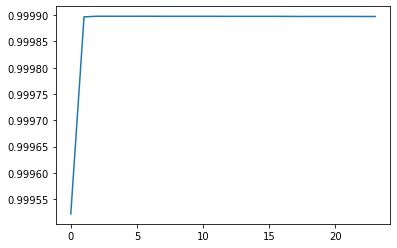

step: 1/2, D_loss: 0.15934859, G_loss_U: 3.0152, G_loss_S: 0.049214963, E_loss_t0: 2.195889


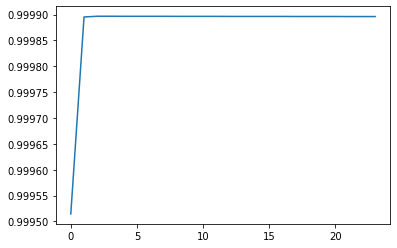

step: 1/2, D_loss: 0.14348449, G_loss_U: 3.0153458, G_loss_S: 0.05921044, E_loss_t0: 2.2399256


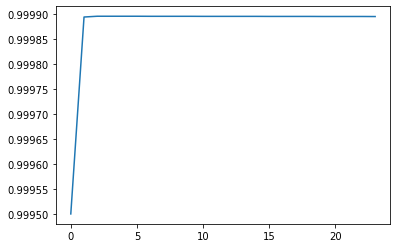

step: 1/2, D_loss: 0.13323098, G_loss_U: 3.0154717, G_loss_S: 0.06958227, E_loss_t0: 2.304814


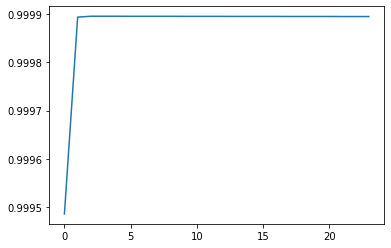

step: 1/2, D_loss: 0.12477031, G_loss_U: 3.015579, G_loss_S: 0.08166158, E_loss_t0: 2.199105


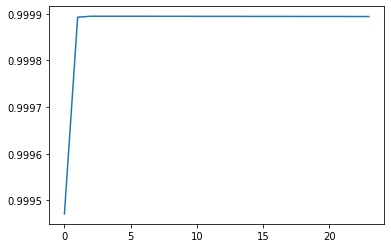

step: 1/2, D_loss: 0.12283733, G_loss_U: 3.0156705, G_loss_S: 0.09038133, E_loss_t0: 2.2973478


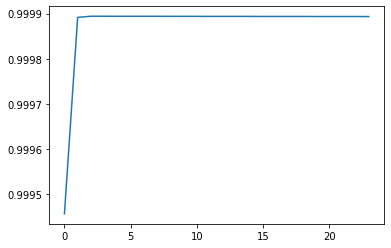

step: 1/2, D_loss: 0.11801354, G_loss_U: 3.0157473, G_loss_S: 0.100371934, E_loss_t0: 2.2088864


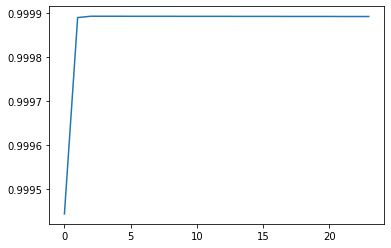

step: 1/2, D_loss: 0.11595074, G_loss_U: 3.015812, G_loss_S: 0.10724771, E_loss_t0: 2.2936673


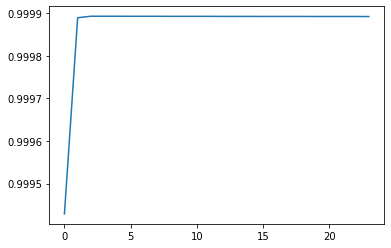

step: 1/2, D_loss: 0.113092974, G_loss_U: 3.0158656, G_loss_S: 0.114126086, E_loss_t0: 2.2778769


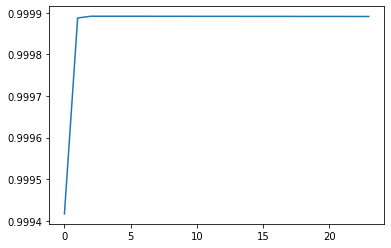

step: 1/2, D_loss: 0.111444294, G_loss_U: 3.0159094, G_loss_S: 0.121434405, E_loss_t0: 2.1704092


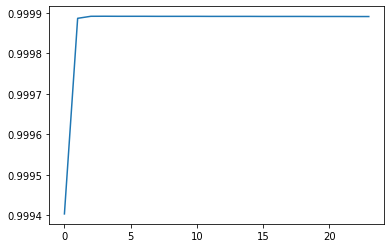

step: 1/2, D_loss: 0.10988824, G_loss_U: 3.0159442, G_loss_S: 0.12572077, E_loss_t0: 2.1953309


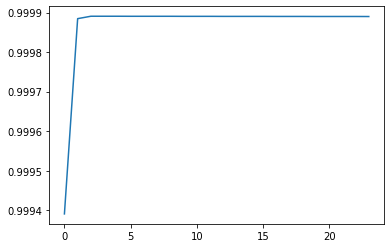

step: 1/2, D_loss: 0.10946375, G_loss_U: 3.0159712, G_loss_S: 0.12962502, E_loss_t0: 2.1654224


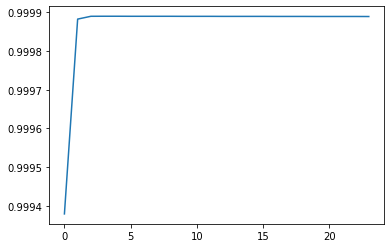

step: 1/2, D_loss: 0.108289294, G_loss_U: 3.0159914, G_loss_S: 0.13207725, E_loss_t0: 2.2111988


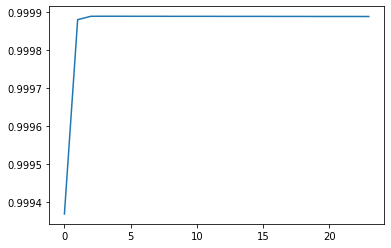

step: 1/2, D_loss: 0.108396806, G_loss_U: 3.0160053, G_loss_S: 0.1342861, E_loss_t0: 2.2085721


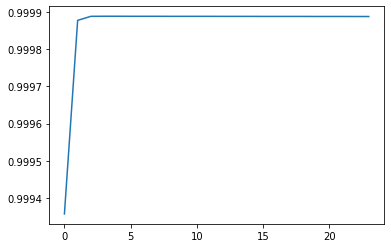

step: 1/2, D_loss: 0.10637456, G_loss_U: 3.0160134, G_loss_S: 0.13578095, E_loss_t0: 2.2324958


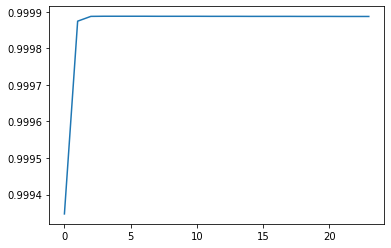

step: 1/2, D_loss: 0.10615471, G_loss_U: 3.0160162, G_loss_S: 0.13779622, E_loss_t0: 2.1424515


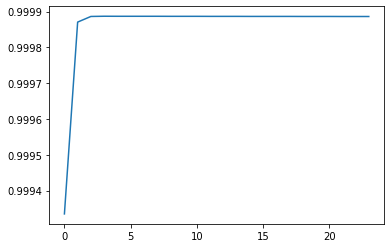

step: 1/2, D_loss: 0.10590407, G_loss_U: 3.0160143, G_loss_S: 0.13729425, E_loss_t0: 2.2580726


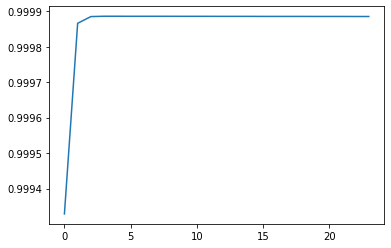

step: 1/2, D_loss: 0.10511452, G_loss_U: 3.0160086, G_loss_S: 0.13797264, E_loss_t0: 2.2239294


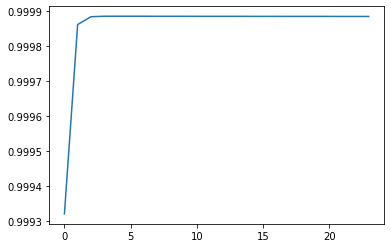

step: 1/2, D_loss: 0.10472904, G_loss_U: 3.0159996, G_loss_S: 0.13806939, E_loss_t0: 2.2264192


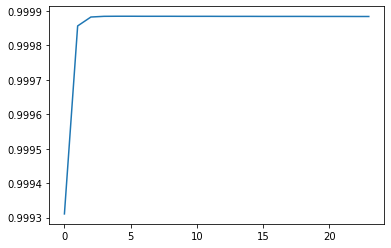

step: 1/2, D_loss: 0.10477824, G_loss_U: 3.0159862, G_loss_S: 0.13731365, E_loss_t0: 2.2631264


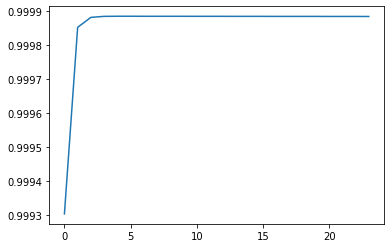

step: 1/2, D_loss: 0.105040014, G_loss_U: 3.0159702, G_loss_S: 0.13780975, E_loss_t0: 2.1794927


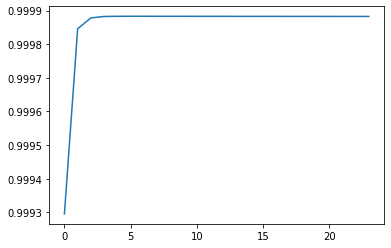

step: 1/2, D_loss: 0.104671545, G_loss_U: 3.0159512, G_loss_S: 0.13667919, E_loss_t0: 2.2219932


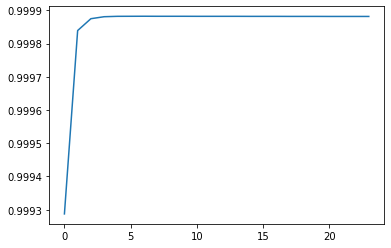

step: 1/2, D_loss: 0.10475369, G_loss_U: 3.01593, G_loss_S: 0.13638316, E_loss_t0: 2.1963115


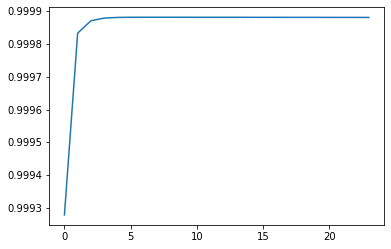

step: 1/2, D_loss: 0.10438842, G_loss_U: 3.0159063, G_loss_S: 0.13507086, E_loss_t0: 2.225596


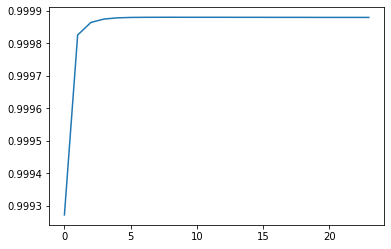

step: 1/2, D_loss: 0.10427411, G_loss_U: 3.0158808, G_loss_S: 0.13562931, E_loss_t0: 2.0861099


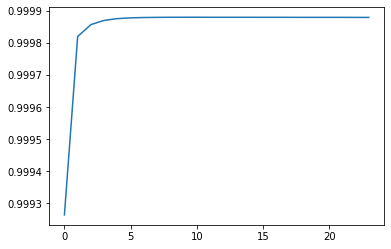

step: 1/2, D_loss: 0.104356684, G_loss_U: 3.0158536, G_loss_S: 0.13313124, E_loss_t0: 2.2104259


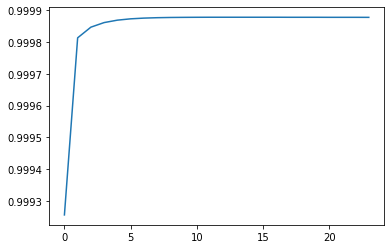

step: 1/2, D_loss: 0.10458933, G_loss_U: 3.0158246, G_loss_S: 0.13295795, E_loss_t0: 2.127992


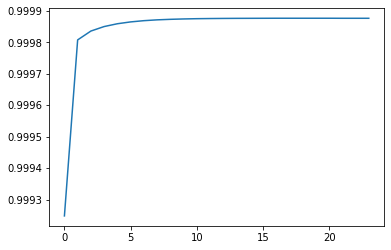

step: 1/2, D_loss: 0.104046285, G_loss_U: 3.015794, G_loss_S: 0.13119745, E_loss_t0: 2.173027


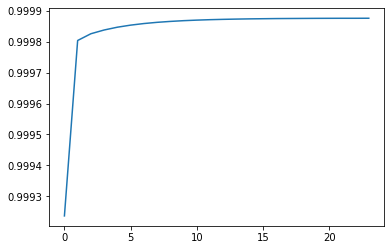

step: 1/2, D_loss: 0.10396852, G_loss_U: 3.015763, G_loss_S: 0.1288935, E_loss_t0: 2.2639077


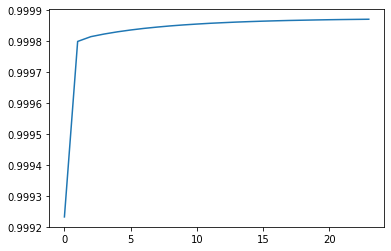

step: 1/2, D_loss: 0.10378799, G_loss_U: 3.0157306, G_loss_S: 0.12855598, E_loss_t0: 2.185804


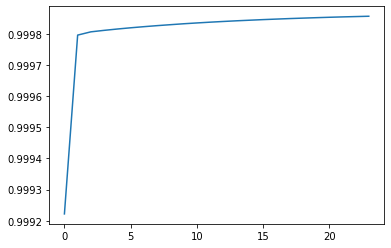

step: 1/2, D_loss: 0.10383512, G_loss_U: 3.0156972, G_loss_S: 0.12670797, E_loss_t0: 2.2396262


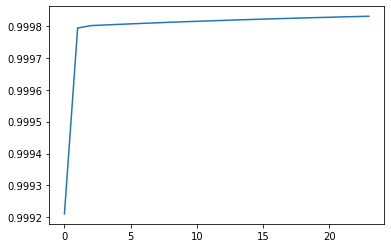

step: 1/2, D_loss: 0.10319134, G_loss_U: 3.0156624, G_loss_S: 0.126672, E_loss_t0: 2.164276


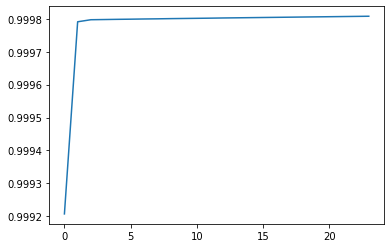

step: 1/2, D_loss: 0.10434561, G_loss_U: 3.0156279, G_loss_S: 0.12433121, E_loss_t0: 2.2350042


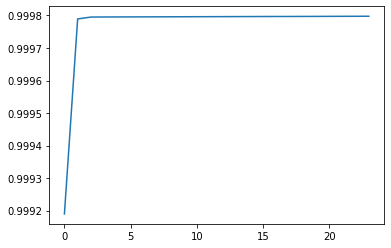

step: 1/2, D_loss: 0.104069985, G_loss_U: 3.0155926, G_loss_S: 0.12382139, E_loss_t0: 2.1627104


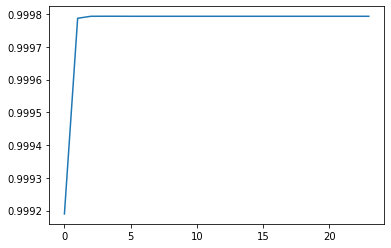

step: 1/2, D_loss: 0.104978874, G_loss_U: 3.0155556, G_loss_S: 0.12153894, E_loss_t0: 2.2457807


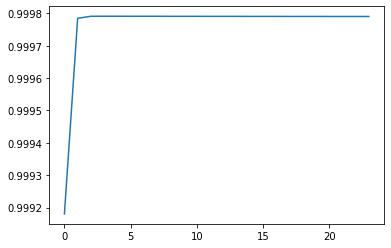

step: 1/2, D_loss: 0.10354927, G_loss_U: 3.0155194, G_loss_S: 0.12132437, E_loss_t0: 2.1644976


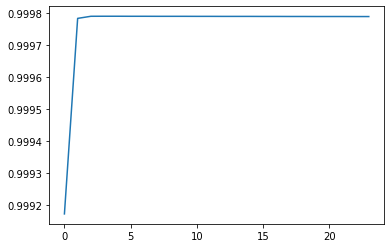

step: 1/2, D_loss: 0.10432945, G_loss_U: 3.0154822, G_loss_S: 0.11950057, E_loss_t0: 2.197178


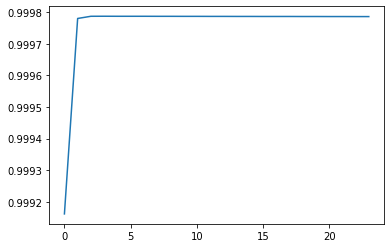

step: 1/2, D_loss: 0.10437078, G_loss_U: 3.015445, G_loss_S: 0.1183, E_loss_t0: 2.1973202


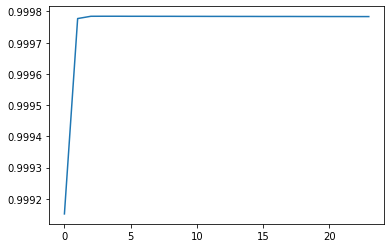

step: 1/2, D_loss: 0.10439193, G_loss_U: 3.0154076, G_loss_S: 0.1174281, E_loss_t0: 2.1573117


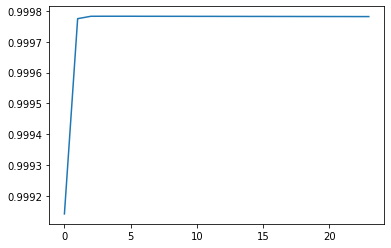

step: 1/2, D_loss: 0.104389265, G_loss_U: 3.0153694, G_loss_S: 0.11632187, E_loss_t0: 2.1437156


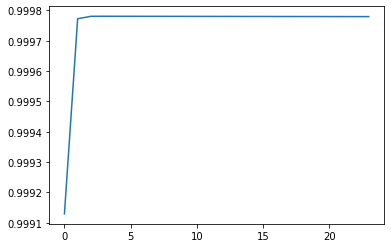

step: 1/2, D_loss: 0.10377622, G_loss_U: 3.0153315, G_loss_S: 0.115104504, E_loss_t0: 2.1429772


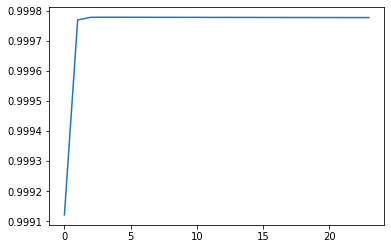

step: 1/2, D_loss: 0.10390047, G_loss_U: 3.0152938, G_loss_S: 0.113368765, E_loss_t0: 2.1837976


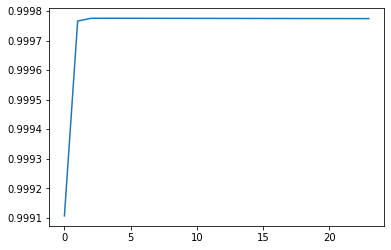

step: 1/2, D_loss: 0.104755886, G_loss_U: 3.0152557, G_loss_S: 0.1118638, E_loss_t0: 2.2217195


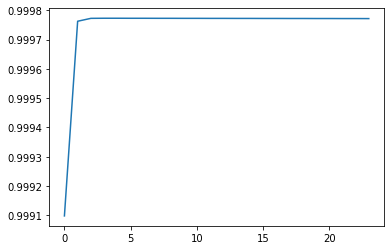

step: 1/2, D_loss: 0.10557164, G_loss_U: 3.0152178, G_loss_S: 0.11074699, E_loss_t0: 2.2144845


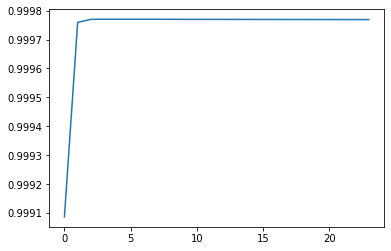

step: 1/2, D_loss: 0.10431046, G_loss_U: 3.0151796, G_loss_S: 0.110497735, E_loss_t0: 2.140989


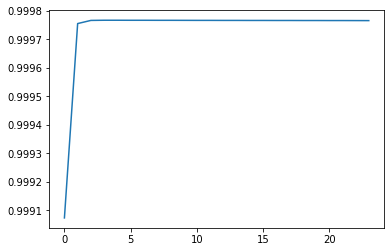

step: 1/2, D_loss: 0.10473196, G_loss_U: 3.0151415, G_loss_S: 0.10866957, E_loss_t0: 2.1868975


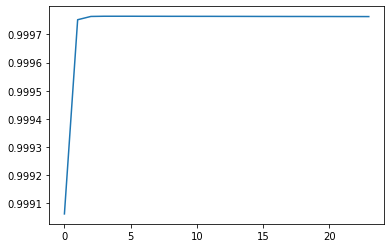

step: 1/2, D_loss: 0.1049192, G_loss_U: 3.0151036, G_loss_S: 0.10709662, E_loss_t0: 2.2199664


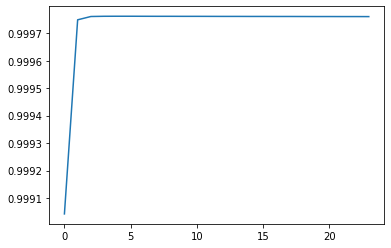

step: 1/2, D_loss: 0.10479486, G_loss_U: 3.0150645, G_loss_S: 0.10616891, E_loss_t0: 2.228125


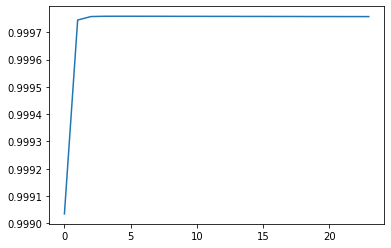

step: 1/2, D_loss: 0.10549114, G_loss_U: 3.0150254, G_loss_S: 0.10625093, E_loss_t0: 2.1299558


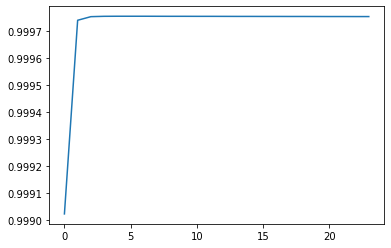

step: 1/2, D_loss: 0.105419606, G_loss_U: 3.014986, G_loss_S: 0.10416877, E_loss_t0: 2.19288


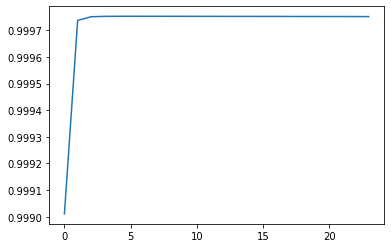

step: 1/2, D_loss: 0.10544682, G_loss_U: 3.014945, G_loss_S: 0.103503786, E_loss_t0: 2.177954


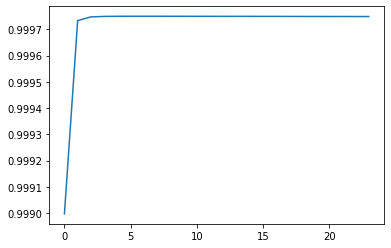

step: 1/2, D_loss: 0.10582103, G_loss_U: 3.0149038, G_loss_S: 0.10172645, E_loss_t0: 2.2319224


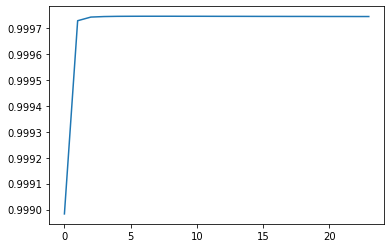

step: 1/2, D_loss: 0.106139235, G_loss_U: 3.0148613, G_loss_S: 0.101181135, E_loss_t0: 2.191322


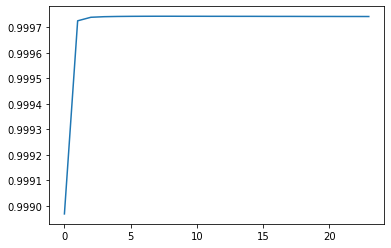

step: 1/2, D_loss: 0.105309695, G_loss_U: 3.0148175, G_loss_S: 0.10009768, E_loss_t0: 2.2010288


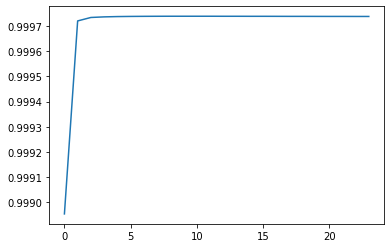

step: 1/2, D_loss: 0.106042795, G_loss_U: 3.0147724, G_loss_S: 0.099233836, E_loss_t0: 2.1903071


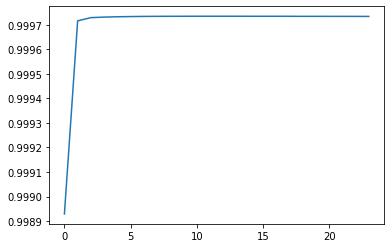

step: 1/2, D_loss: 0.10645897, G_loss_U: 3.014726, G_loss_S: 0.097697064, E_loss_t0: 2.2346935


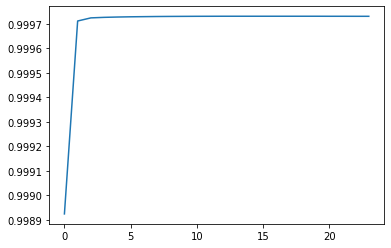

step: 1/2, D_loss: 0.10648191, G_loss_U: 3.0146787, G_loss_S: 0.09791168, E_loss_t0: 2.1384664


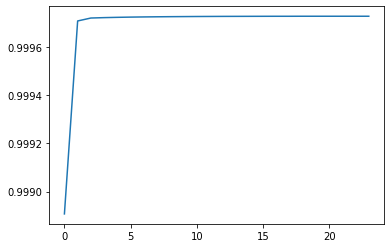

step: 1/2, D_loss: 0.106511794, G_loss_U: 3.0146306, G_loss_S: 0.096908964, E_loss_t0: 2.1565056


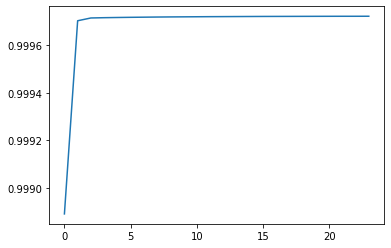

step: 1/2, D_loss: 0.10676737, G_loss_U: 3.0145826, G_loss_S: 0.09527921, E_loss_t0: 2.2027397


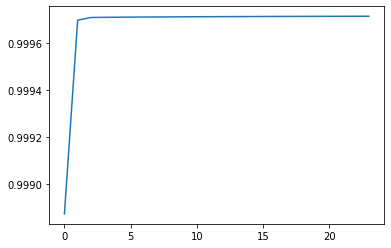

step: 1/2, D_loss: 0.106548436, G_loss_U: 3.014534, G_loss_S: 0.093842216, E_loss_t0: 2.2412157


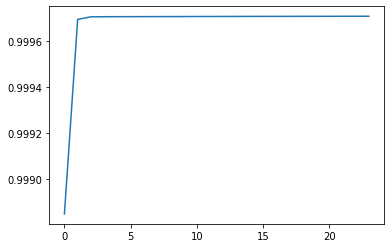

step: 1/2, D_loss: 0.106129035, G_loss_U: 3.0144863, G_loss_S: 0.09359108, E_loss_t0: 2.1892757


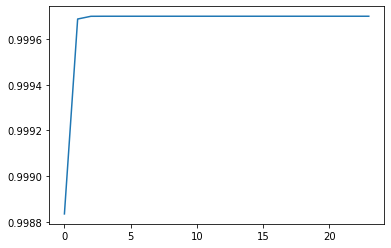

step: 1/2, D_loss: 0.10701756, G_loss_U: 3.0144386, G_loss_S: 0.09202325, E_loss_t0: 2.2270007


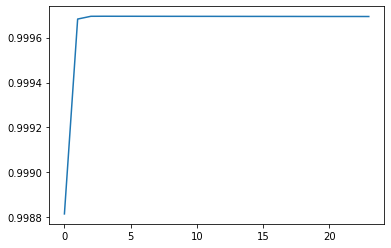

step: 1/2, D_loss: 0.10694486, G_loss_U: 3.0143921, G_loss_S: 0.09155818, E_loss_t0: 2.2089877


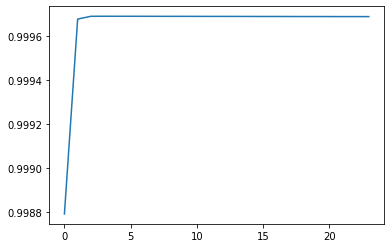

step: 1/2, D_loss: 0.10814526, G_loss_U: 3.014346, G_loss_S: 0.09061926, E_loss_t0: 2.2247345


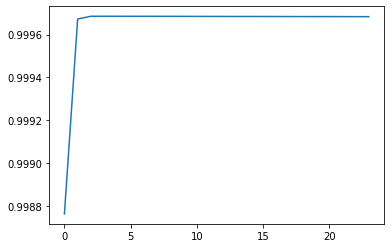

step: 1/2, D_loss: 0.107653715, G_loss_U: 3.0142994, G_loss_S: 0.088753596, E_loss_t0: 2.264276


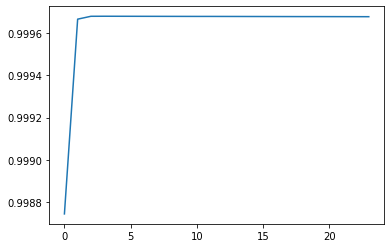

step: 1/2, D_loss: 0.1066134, G_loss_U: 3.014253, G_loss_S: 0.08910723, E_loss_t0: 2.2026386


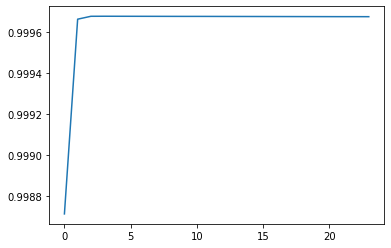

step: 1/2, D_loss: 0.108470984, G_loss_U: 3.014206, G_loss_S: 0.08857922, E_loss_t0: 2.1986432


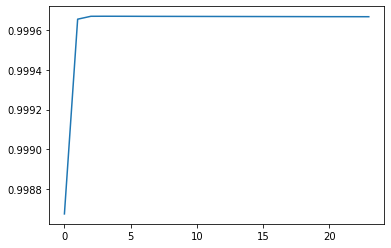

step: 1/2, D_loss: 0.10781343, G_loss_U: 3.0141575, G_loss_S: 0.087973155, E_loss_t0: 2.168618


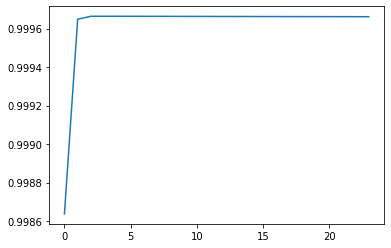

step: 1/2, D_loss: 0.108513154, G_loss_U: 3.0141075, G_loss_S: 0.08669287, E_loss_t0: 2.2130027


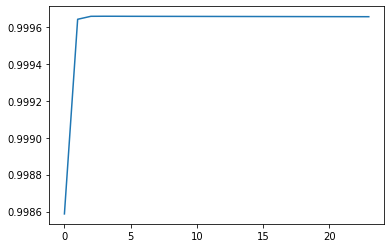

step: 1/2, D_loss: 0.107691206, G_loss_U: 3.0140555, G_loss_S: 0.08714921, E_loss_t0: 2.1155477


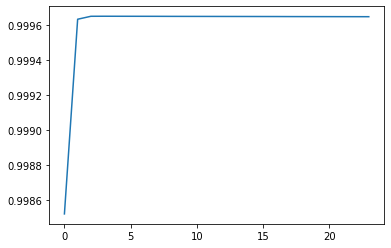

step: 1/2, D_loss: 0.10852978, G_loss_U: 3.0140018, G_loss_S: 0.08614383, E_loss_t0: 2.1380904


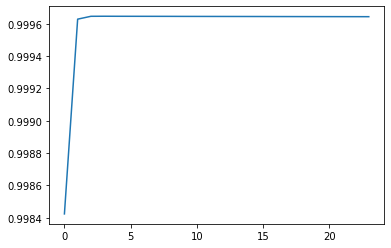

step: 1/2, D_loss: 0.108625434, G_loss_U: 3.0139465, G_loss_S: 0.084726915, E_loss_t0: 2.1796978


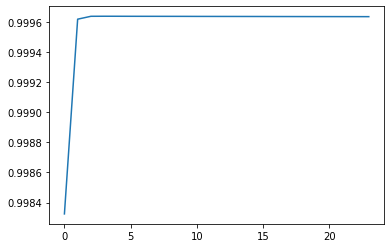

step: 1/2, D_loss: 0.108399436, G_loss_U: 3.0138912, G_loss_S: 0.082718045, E_loss_t0: 2.270389


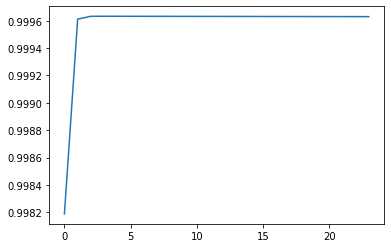

step: 1/2, D_loss: 0.10914711, G_loss_U: 3.0138369, G_loss_S: 0.08206215, E_loss_t0: 2.2565706


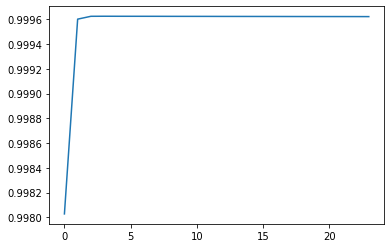

step: 1/2, D_loss: 0.108937085, G_loss_U: 3.0137846, G_loss_S: 0.08300398, E_loss_t0: 2.165423


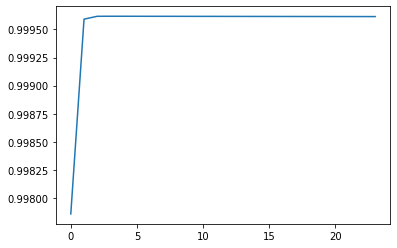

step: 1/2, D_loss: 0.109126285, G_loss_U: 3.0137346, G_loss_S: 0.081496246, E_loss_t0: 2.2029727


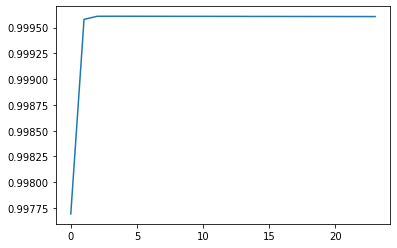

step: 1/2, D_loss: 0.10929931, G_loss_U: 3.0136864, G_loss_S: 0.079441845, E_loss_t0: 2.294234


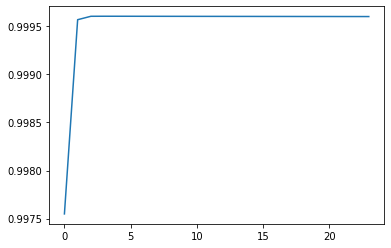

step: 1/2, D_loss: 0.109085165, G_loss_U: 3.0136397, G_loss_S: 0.08099245, E_loss_t0: 2.1623802


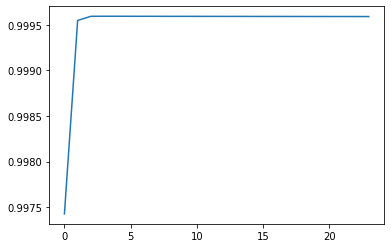

step: 1/2, D_loss: 0.10949305, G_loss_U: 3.0135937, G_loss_S: 0.07892095, E_loss_t0: 2.2328403


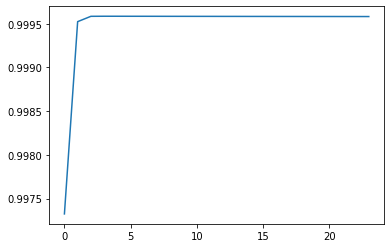

step: 1/2, D_loss: 0.109260984, G_loss_U: 3.013548, G_loss_S: 0.07997073, E_loss_t0: 2.1352007


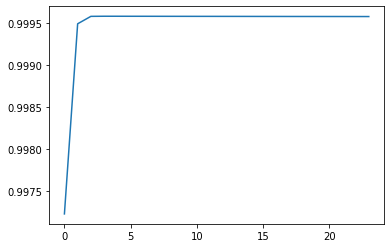

step: 1/2, D_loss: 0.11068923, G_loss_U: 3.0135021, G_loss_S: 0.07721318, E_loss_t0: 2.2702725


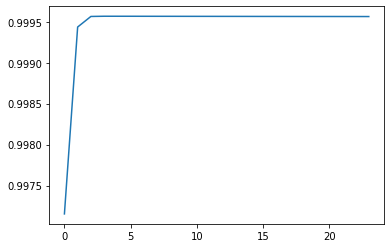

step: 1/2, D_loss: 0.11077774, G_loss_U: 3.013456, G_loss_S: 0.07815621, E_loss_t0: 2.1693444


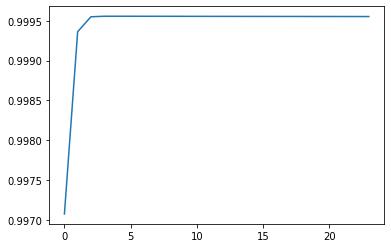

step: 1/2, D_loss: 0.1094803, G_loss_U: 3.0134094, G_loss_S: 0.07761612, E_loss_t0: 2.1662676


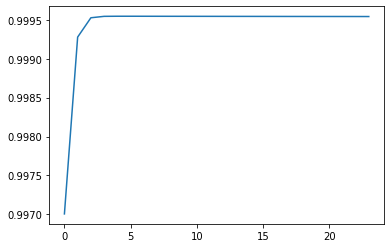

step: 1/2, D_loss: 0.10996087, G_loss_U: 3.013362, G_loss_S: 0.07680336, E_loss_t0: 2.1558635


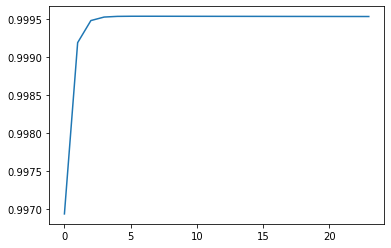

step: 1/2, D_loss: 0.110669546, G_loss_U: 3.013314, G_loss_S: 0.07532205, E_loss_t0: 2.2300317


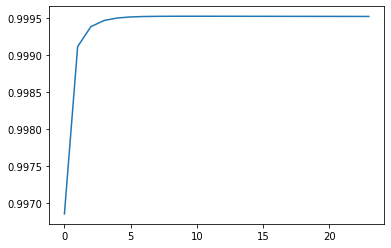

step: 1/2, D_loss: 0.11035387, G_loss_U: 3.0132647, G_loss_S: 0.07576504, E_loss_t0: 2.1445973


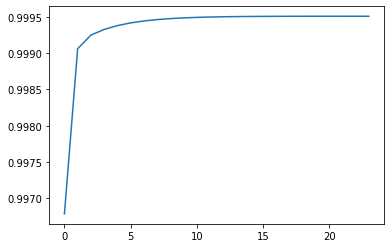

step: 1/2, D_loss: 0.11105724, G_loss_U: 3.0132148, G_loss_S: 0.073225066, E_loss_t0: 2.2712257


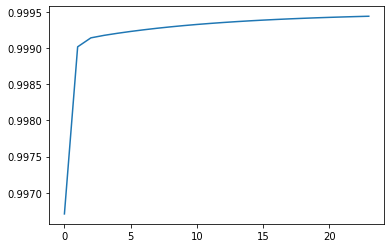

step: 1/2, D_loss: 0.110590756, G_loss_U: 3.0131633, G_loss_S: 0.07447443, E_loss_t0: 2.1601648


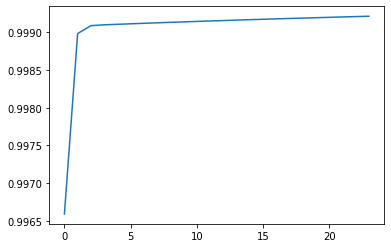

step: 1/2, D_loss: 0.11103429, G_loss_U: 3.0131104, G_loss_S: 0.07237808, E_loss_t0: 2.2760503


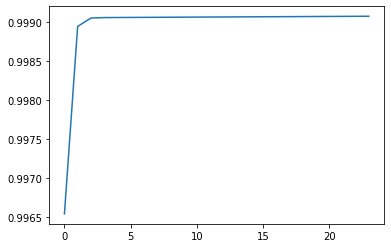

step: 1/2, D_loss: 0.11065489, G_loss_U: 3.0130565, G_loss_S: 0.07167282, E_loss_t0: 2.2657928


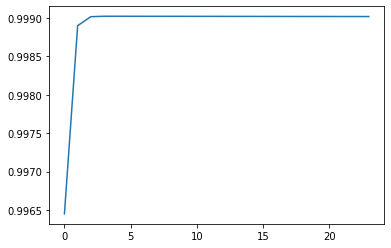

step: 1/2, D_loss: 0.11206829, G_loss_U: 3.0130014, G_loss_S: 0.071617045, E_loss_t0: 2.212395


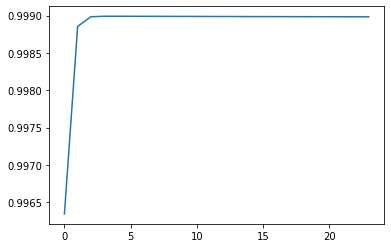

step: 1/2, D_loss: 0.111920916, G_loss_U: 3.012945, G_loss_S: 0.070238784, E_loss_t0: 2.2876976


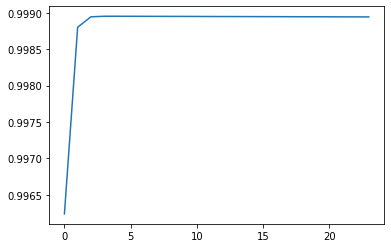

step: 1/2, D_loss: 0.11165502, G_loss_U: 3.0128872, G_loss_S: 0.07186042, E_loss_t0: 2.1328127


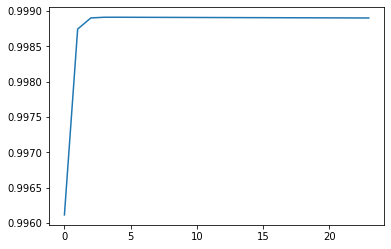

step: 1/2, D_loss: 0.11211081, G_loss_U: 3.0128288, G_loss_S: 0.070627734, E_loss_t0: 2.170414


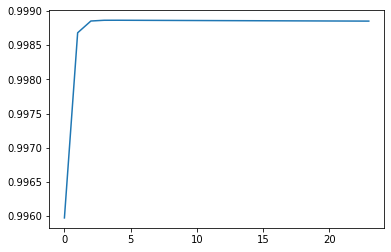

step: 1/2, D_loss: 0.11246457, G_loss_U: 3.012769, G_loss_S: 0.06900499, E_loss_t0: 2.2609172


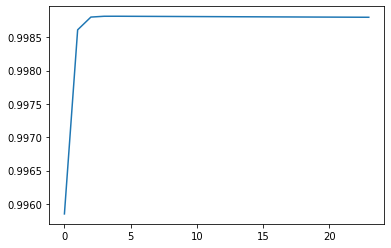

step: 1/2, D_loss: 0.11212334, G_loss_U: 3.0127087, G_loss_S: 0.07118034, E_loss_t0: 2.033445


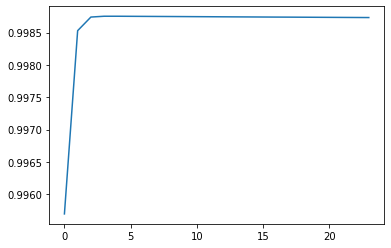

step: 1/2, D_loss: 0.11181822, G_loss_U: 3.0126476, G_loss_S: 0.06836219, E_loss_t0: 2.2239873


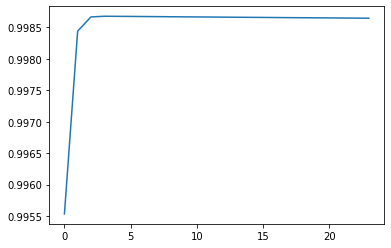

Finish Joint Training


In [4]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

A Data Set of the same size and dimensions of the original synthetic data Set is generated and visualized and both are compared

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.860481
[t-SNE] KL divergence after 300 iterations: 0.839520


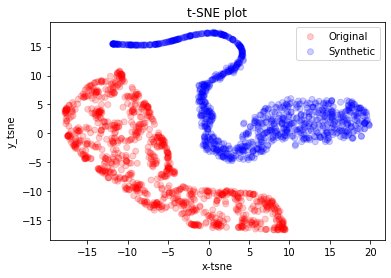

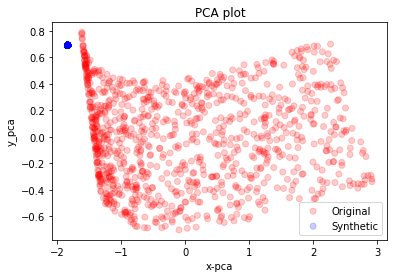

In [6]:
random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator(torch.tensor(random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])).float())[0]
test_sample = torch.reshape(test_sample, (no, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (no, seq_len, dim))
visualization(data, test_recovery.detach().numpy(), 'tsne')
visualization(data, test_recovery.detach().numpy(), 'pca')
  